In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import r2_score
color_pal=sns.color_palette()

In [2]:
df=pd.read_csv('product h.csv', parse_dates=['Month-Year'], index_col='Month-Year')

In [3]:
df.head()

,Product Name,Product Category,Month,Year,Sales,Market Size,Marketing Expense,Month No.
Month-Year,,,,,,,,
2019-01-01,Product H,Anti Biotic Upper Respiratory,January,2019,62686,142038,447509,1
2019-02-01,Product H,Anti Biotic Upper Respiratory,February,2019,74426,168635,531319,2
2019-03-01,Product H,Anti Biotic Upper Respiratory,March,2019,91347,206976,652116,3
2019-04-01,Product H,Anti Biotic Upper Respiratory,April,2019,60600,137309,432617,4
2019-05-01,Product H,Anti Biotic Upper Respiratory,May,2019,37374,84683,266809,5


In [4]:
sales_h= df.drop(['Product Name','Product Category','Month','Market Size', 'Marketing Expense'],axis=1)

In [5]:
sales_h.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2019-01-01 to 2023-12-01
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Year       60 non-null     int64
 1   Sales      60 non-null     int64
 2   Month No.  60 non-null     int64
dtypes: int64(3)
memory usage: 1.9 KB


In [6]:
sales_h.head()

,Year,Sales,Month No.
Month-Year,,,
2019-01-01,2019,62686,1
2019-02-01,2019,74426,2
2019-03-01,2019,91347,3
2019-04-01,2019,60600,4
2019-05-01,2019,37374,5


<Axes: title={'center': 'Product H'}, xlabel='Month-Year'>

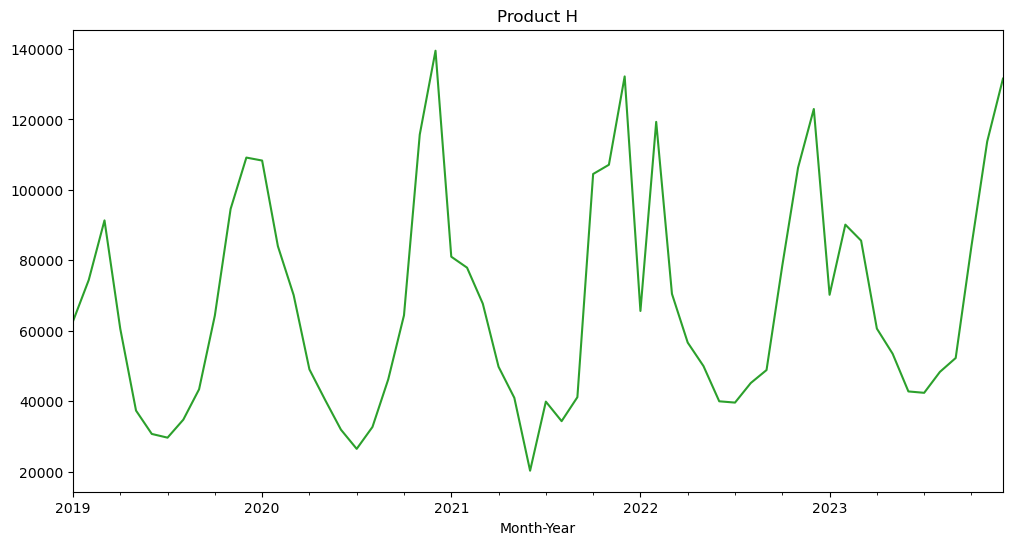

In [7]:
sales_h['Sales'].plot(figsize=(12,6),color=color_pal[2],title='Product H')

<Axes: ylabel='Frequency'>

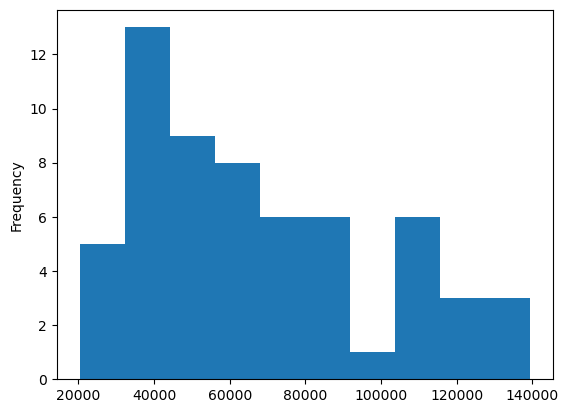

In [8]:
sales_h['Sales'].plot(kind='hist')

# Visualization

In [9]:
sales_h.head()

,Year,Sales,Month No.
Month-Year,,,
2019-01-01,2019,62686,1
2019-02-01,2019,74426,2
2019-03-01,2019,91347,3
2019-04-01,2019,60600,4
2019-05-01,2019,37374,5


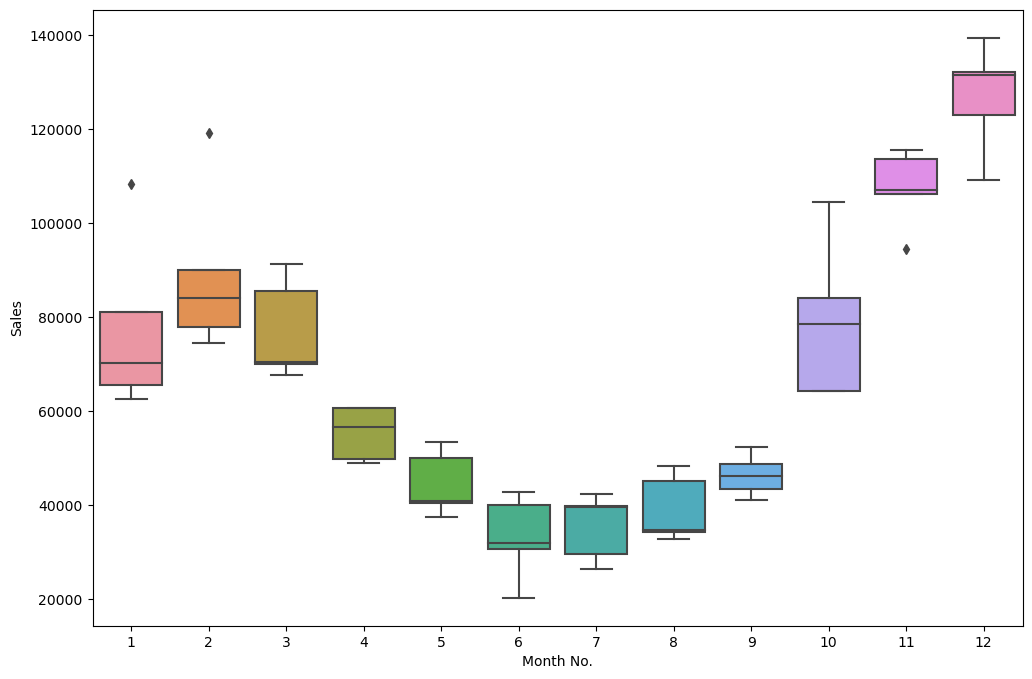

In [10]:
plt.figure(figsize=(12,8))
sns.boxplot(data=sales_h, x='Month No.',y='Sales')
plt.show()

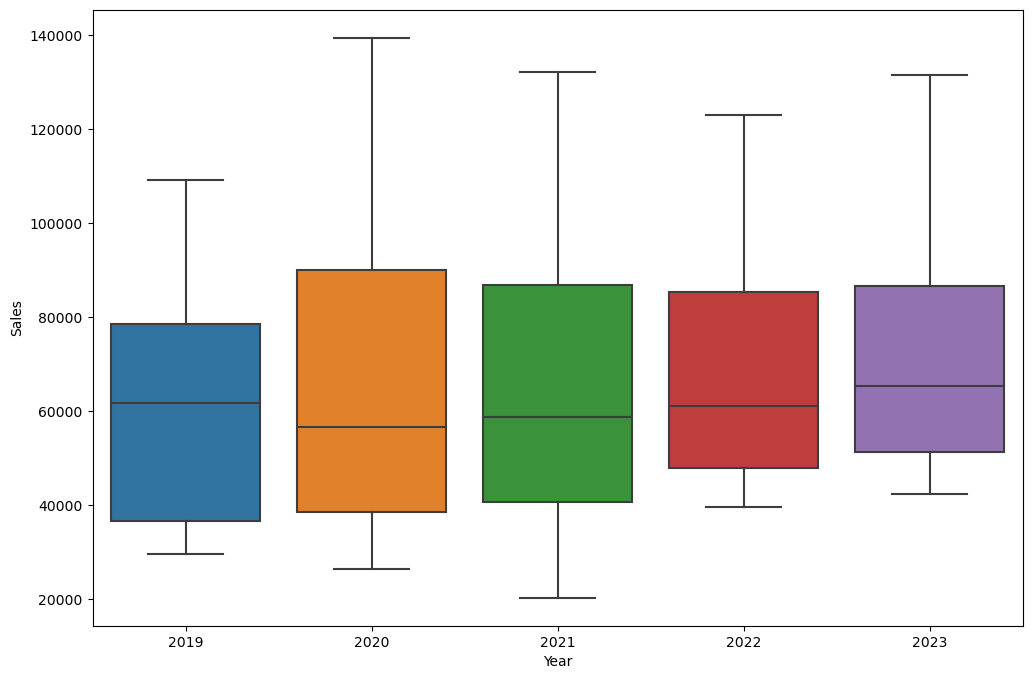

In [11]:
plt.figure(figsize=(12,8))
sns.boxplot(data=sales_h, x='Year',y='Sales')
plt.show()

# Feature Engineering

In [12]:
sales_h = df.drop(['Product Name','Product Category','Month','Market Size', 'Marketing Expense','Month No.','Year'],axis=1)

In [13]:
sales_h['quarter'] = sales_h.index.quarter
sales_h['month'] = sales_h.index.month
sales_h['year'] = sales_h.index.year

In [14]:
print(sales_h)

             Sales  quarter  month  year
Month-Year                              
2019-01-01   62686        1      1  2019
2019-02-01   74426        1      2  2019
2019-03-01   91347        1      3  2019
2019-04-01   60600        2      4  2019
2019-05-01   37374        2      5  2019
2019-06-01   30737        2      6  2019
2019-07-01   29683        3      7  2019
2019-08-01   34788        3      8  2019
2019-09-01   43408        3      9  2019
2019-10-01   64323        4     10  2019
2019-11-01   94574        4     11  2019
2019-12-01  109171        4     12  2019
2020-01-01  108329        1      1  2020
2020-02-01   84031        1      2  2020
2020-03-01   70140        1      3  2020
2020-04-01   49066        2      4  2020
2020-05-01   40363        2      5  2020
2020-06-01   31950        2      6  2020
2020-07-01   26500        3      7  2020
2020-08-01   32716        3      8  2020
2020-09-01   46216        3      9  2020
2020-10-01   64406        4     10  2020
2020-11-01  1156

# Train/Test Split

In [15]:
train= sales_h[:48]
test=sales_h[48:]

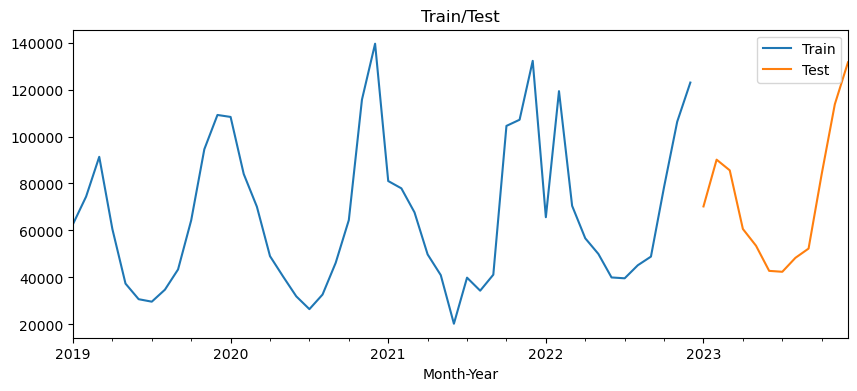

In [16]:
fig,ax=plt.subplots(figsize=(10,4))
train['Sales'].plot(ax=ax,label='Train set',title='Train/Test')
test['Sales'].plot(ax=ax,label='Test set')
plt.legend(['Train','Test'])
plt.show()

In [17]:
len(train)

48

In [18]:
x_train = train.drop(columns=['Sales'])
y_train=train['Sales']
x_test=test.drop(columns=['Sales'])
y_test=test['Sales']

In [19]:
from sklearn.model_selection import GridSearchCV


# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.001,0.01, 0.1, 0.2],
    'n_estimators': [100, 500, 1000, 2000],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'subsample': [0.7, 0.8, 0.9, 1.0]
}

# Instantiate the XGBoost regressor
regressor = xgb.XGBRegressor(objective='reg:squarederror')

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', 
                           verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(x_train, y_train)

# Access the best parameters
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best parameters:", best_params)
print("Best estimator:", best_estimator)


Fitting 5 folds for each of 768 candidates, totalling 3840 fits
Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'subsample': 1.0}
Best estimator: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [20]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=500,
                       objective='reg:squarederror',
                       max_depth=3,
                       colsample_bytree=0.7,
                       subsample= 1.0,
                       early_stopping_rounds=50,
                       learning_rate=0.01)

reg.fit(x_train, y_train,
        eval_set=[(x_train, y_train), (x_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:72668.42066	validation_1-rmse:77302.77766
[100]	validation_0-rmse:31417.29329	validation_1-rmse:35026.90771
[200]	validation_0-rmse:16391.66699	validation_1-rmse:17848.48181
[300]	validation_0-rmse:11387.61309	validation_1-rmse:10823.72844
[400]	validation_0-rmse:9757.89615	validation_1-rmse:8095.07489
[499]	validation_0-rmse:9096.55365	validation_1-rmse:7155.10728


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [21]:
reg.best_iteration

499

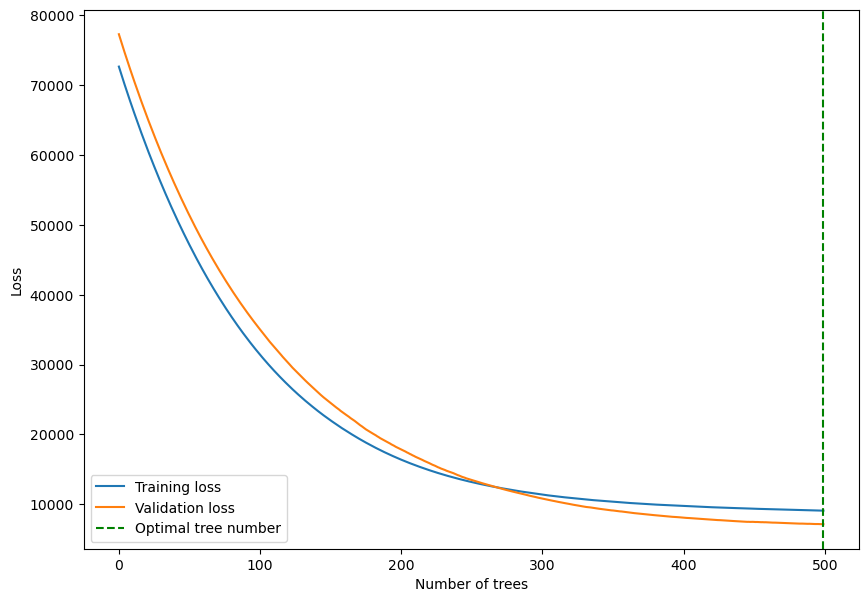

In [22]:
results = reg.evals_result()

plt.figure(figsize=(10,7))
plt.plot(results["validation_0"]["rmse"], label="Training loss")
plt.plot(results["validation_1"]["rmse"], label="Validation loss")
plt.axvline(499,color='green',ls='--', label="Optimal tree number")
plt.xlabel("Number of trees")
plt.ylabel("Loss")
plt.legend()

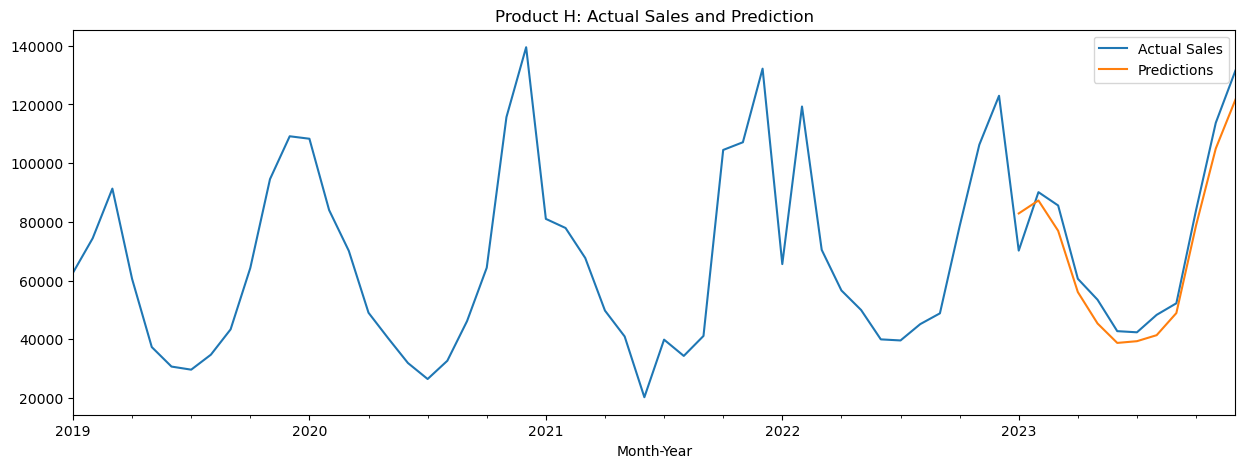

In [23]:
pred=reg.predict(x_test)
sales_h['prediction']=[None]*len(train) + list(pred)

ax = sales_h['Sales'].plot(figsize=(15, 5))
sales_h['prediction'].plot()
plt.legend(['Actual Sales', 'Predictions'])
ax.set_title('Product H: Actual Sales and Prediction')
plt.show()

In [24]:
mae_xgb= mean_absolute_error(test['Sales'],pred)
mse_xgb=mean_squared_error(test['Sales'], pred)
mape_xgb= mean_absolute_percentage_error(test['Sales'],pred)
rmse_xgb= np.sqrt(mean_squared_error(test['Sales'],pred))

print(f'MAE - XGBoost: {mae_xgb:0.3f}')
print(f'MAPE - XGBoost: {mape_xgb:0.3f}')
print(f'MSE - XGBoost: {mse_xgb:0.3f}')
print(f'RMSE - XGBoost: {rmse_xgb:0.3f}')

MAE - XGBoost: 6488.360
MAPE - XGBoost: 0.094
MSE - XGBoost: 51195559.533
RMSE - XGBoost: 7155.107


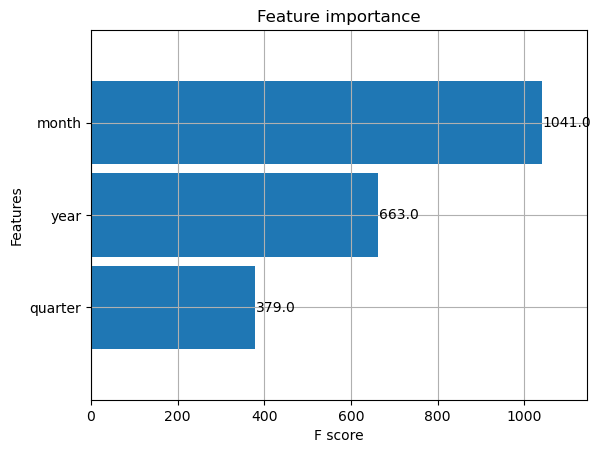

In [25]:
from xgboost import plot_importance

_ = plot_importance(reg, height=0.9)
